In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import adjusted_rand_score


In [ ]:

df = pd.read_csv('data/heart_disease_selected_features.csv')


X = df.drop('target', axis=1)
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

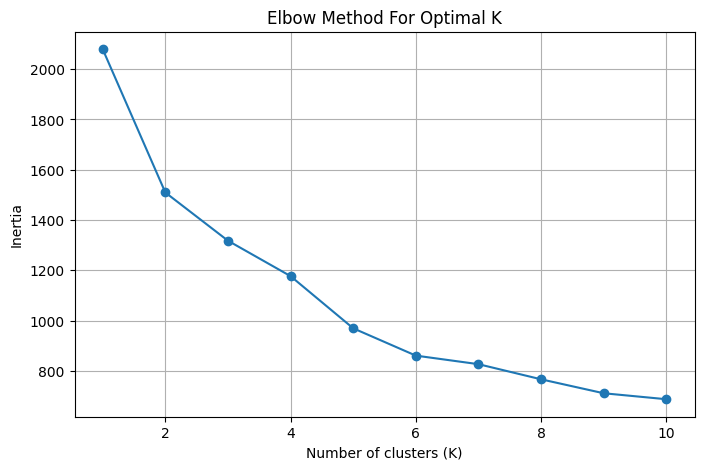

In [ ]:
# K-Means Clustering (Elbow Method)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

#
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


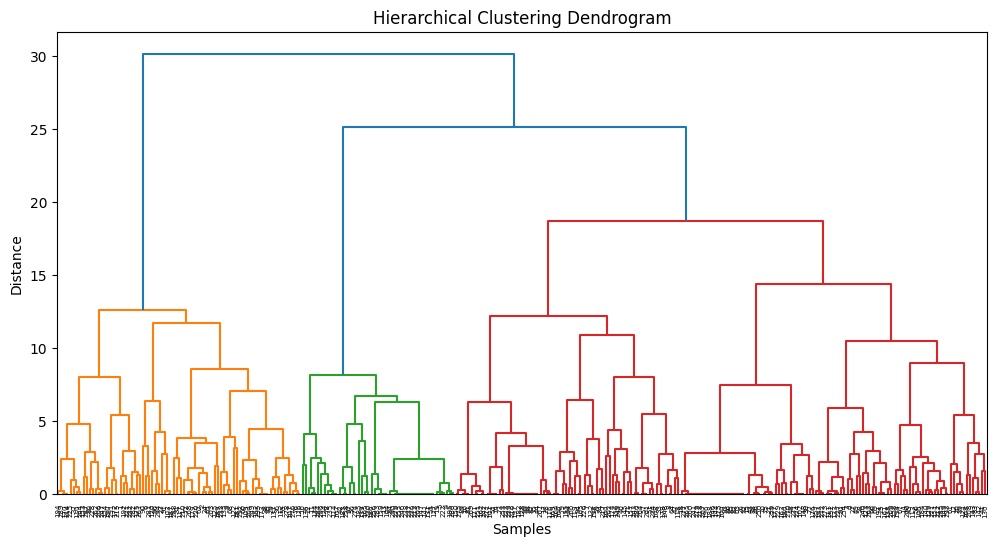

In [ ]:
# Hierarchical Clustering (Dendrogram)
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


clusters_hier = fcluster(linked, 2, criterion='maxclust')



In [ ]:
# Compare clusters with actual disease labels
print("K-Means Adjusted Rand Index:", adjusted_rand_score(y, clusters_kmeans))
print("Hierarchical Adjusted Rand Index:", adjusted_rand_score(y, clusters_hier - 1))  # fcluster labels start at 1

K-Means Adjusted Rand Index: 0.3943229769604393
Hierarchical Adjusted Rand Index: 0.24197861231747422


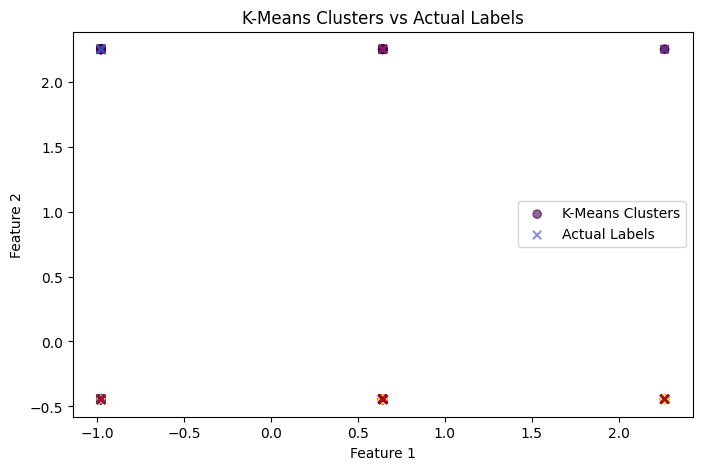

In [ ]:
# Visualize clusters vs actual labels
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, cmap='viridis', label='K-Means Clusters', alpha=0.6)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', marker='x', label='Actual Labels', alpha=0.6)
plt.title('K-Means Clusters vs Actual Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['K-Means Clusters', 'Actual Labels'])